In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread("lena.jpeg")

while True:
    cv2.imshow("Lena",img)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

In [9]:
frameWidth = 640
frameHeight = 480

cap = cv2.VideoCapture(0)

#cap.set(3,frameWidth)
#cap.set(4,frameHeight)

while True:
    
    con, img = cap.read()
    img = cv2.resize(img,(frameWidth,frameHeight))
    
    if con:       
        cv2.imshow("Road",cv2.flip(img,1))    
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

----

In [9]:
path = "lena.jpeg"

kernel = np.ones((5,5),np.uint8)

img = cv2.imread(path) # 3 channels !!!
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray, ksize = (7,7), sigmaX = 0)
imgCanny = cv2.Canny(imgBlur, 100 ,100)
imgDilation = cv2.dilate(imgCanny,kernel,iterations = 1)
imgEroded = cv2.erode(imgDilation,kernel,iterations = 1)

while True:
    
    test_img = np.concatenate([imgGray,imgBlur,imgCanny,imgDilation,imgEroded],axis = 1)
    cv2.imshow("Concatenate",test_img)
    
    k = cv2.waitKey(1) & 0xFF == ord("q")
    if k :
        break

cv2.destroyAllWindows()

In [10]:
#while True:
    
#    cv2.imshow("Lena",img)
#    cv2.imshow("Gray",imgGray)
#    cv2.imshow("Blur",imgBlur)
#    cv2.imshow("Canny",imgCanny)
#    cv2.imshow("Dilation",imgDilation)
#    cv2.imshow("Eroded",imgEroded)
    
#    k = cv2.waitKey(1) & 0xFF == ord("q")
#    if k :
#        break

#cv2.destroyAllWindows()

----

In [10]:
import cv2
import numpy as np

path = "lena.jpeg"
img = cv2.imread(path)
print("Original Image : ",img.shape)

width ,height = 400,400
imgResized = cv2.resize(img,(width,height))
print("Resized Image : ",imgResized.shape)

imgCropped = img[0:110,110:220]
print("Cropped Image : ",imgCropped.shape)

imgCropResized = cv2.resize(imgCropped,(img.shape[1],img.shape[0]))
print("Crop Resized Image : ",imgCropResized.shape)

Original Image :  (220, 220, 3)
Resized Image :  (400, 400, 3)
Cropped Image :  (110, 110, 3)
Crop Resized Image :  (220, 220, 3)


----

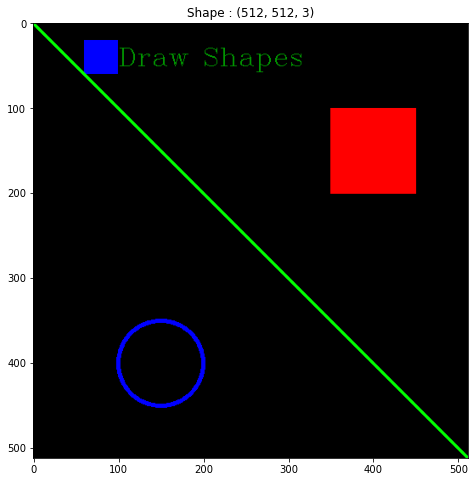

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Zeros -- > Black
# Ones -- > White

img = np.zeros((512,512,3),np.uint8)

# BGR --- > For cv2
# RGB -- > For matplotlib

# height,width !!!
# 3 Channels

img[20:60, 60:100] = 255, 0, 0

cv2.line(img,(0,0),(img.shape[1],img.shape[0]),(0,255,0),2)
cv2.rectangle(img, (350,100),(450,200),(0,0,255),cv2.FILLED)
cv2.circle(img,(150,400),50,(255,0,0),3)
cv2.putText(img,"Draw Shapes",(100,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,150,0),1)

plt.figure(figsize = (8,8))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title(f"Shape : {img.shape}")
plt.show()


---

Org1 Shape :  (220, 220, 3)
Org2 Shape :  (600, 800, 3)

Resize Org1 Shape :  (110, 110, 3)
Resize Org2 Shape :  (300, 400, 3)

Horizontal Stack :  (220, 440, 3)
Vertical Stack :  (440, 220, 3)


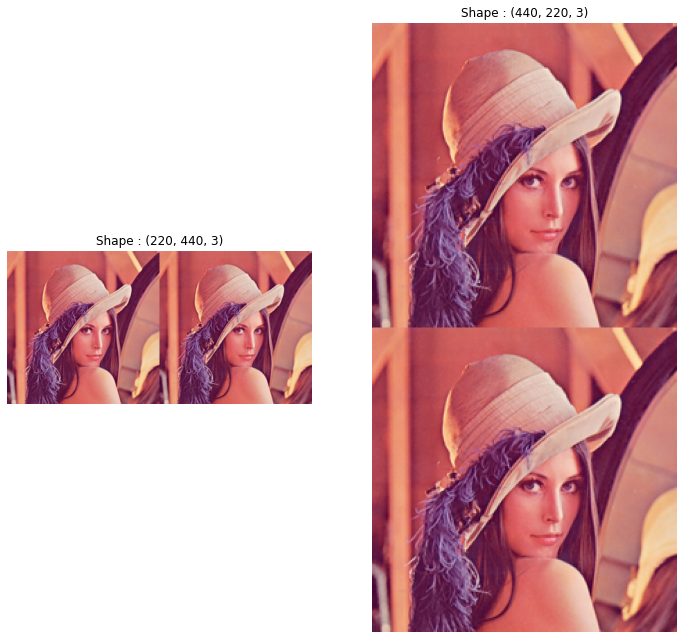

In [40]:
import cv2
import numpy as np

path1 = "lena.jpeg"
path2 = "land.png"

img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
print("Org1 Shape : ", img1.shape )
print("Org2 Shape : ", img2.shape)

Resized_img1 = cv2.resize(img1,(0,0),None,0.5,0.5)
Resized_img2 = cv2.resize(img2,(0,0),None,0.5,0.5)

print()
print("Resize Org1 Shape : ", Resized_img1.shape )
print("Resize Org2 Shape : ", Resized_img2.shape)

hor = np.hstack((img1,img1))
ver = np.vstack((img1,img1))

print()
print("Horizontal Stack : ",hor.shape)
print("Vertical Stack : ",ver.shape)


plt.figure(figsize = (12,12))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(hor,cv2.COLOR_BGR2RGB))
plt.title(f"Shape : {hor.shape}")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(ver,cv2.COLOR_BGR2RGB))
plt.title(f"Shape : {ver.shape}")
plt.axis("off")
plt.show()

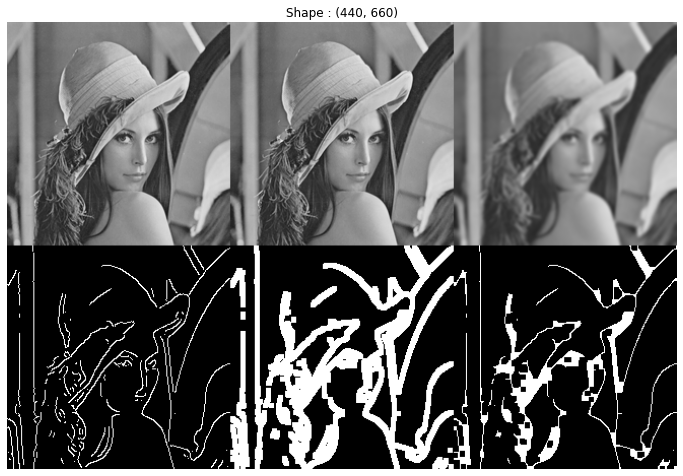

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path = "lena.jpeg"

kernel = np.ones((5,5),np.uint8)

img = cv2.imread(path) # 3 channels !!!
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray, ksize = (7,7), sigmaX = 0)
imgCanny = cv2.Canny(imgBlur, 100 ,100)
imgDilation = cv2.dilate(imgCanny,kernel,iterations = 1)
imgEroded = cv2.erode(imgDilation,kernel,iterations = 1)

hor1 = np.hstack((cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),imgGray,imgBlur))
hor2 = np.hstack((imgCanny,imgDilation,imgEroded))
ver = np.vstack((hor1,hor2))

plt.figure(figsize = (12,12))
plt.imshow(cv2.cvtColor(ver,cv2.COLOR_BGR2RGB))
plt.title(f"Shape : {ver.shape}")
plt.axis("off")
plt.show()

In [49]:
def stackImages(scale,imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape [:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None,scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        ver = hor
    return ver

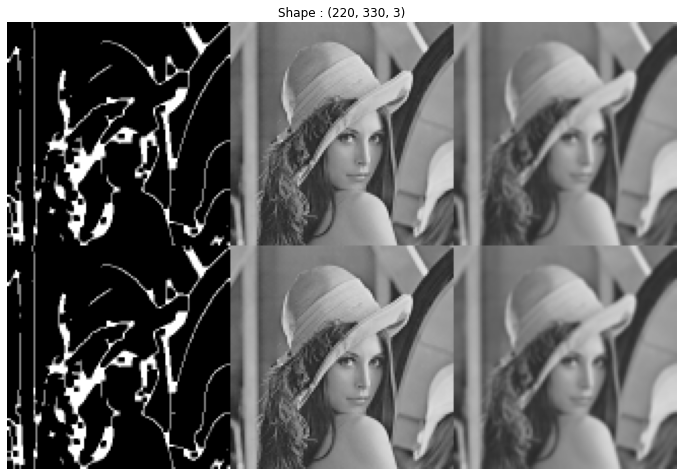

In [53]:
StackedImages = stackImages(scale = 0.5,imgArray = ([imgEroded,imgGray,imgBlur],[imgEroded,imgGray,imgBlur]))

plt.figure(figsize = (12,12))
plt.imshow(cv2.cvtColor(StackedImages,cv2.COLOR_BGR2RGB))
plt.title(f"Shape : {StackedImages.shape}")
plt.axis("off")
plt.show()

---

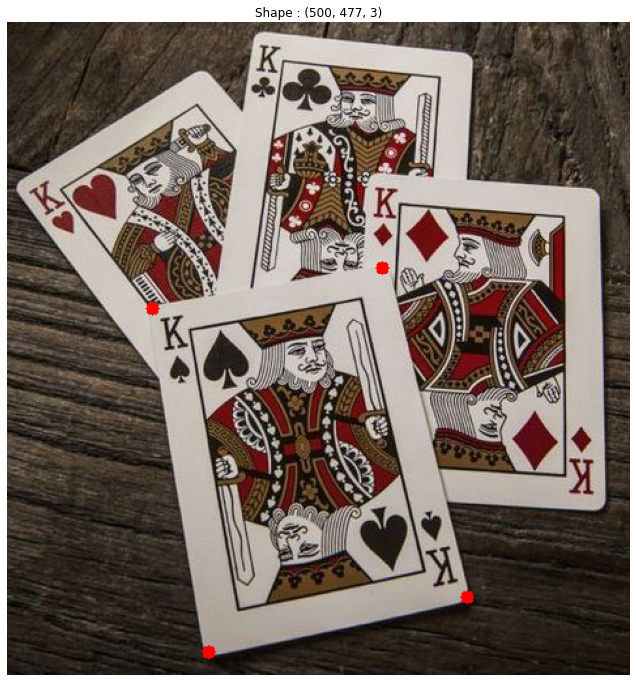

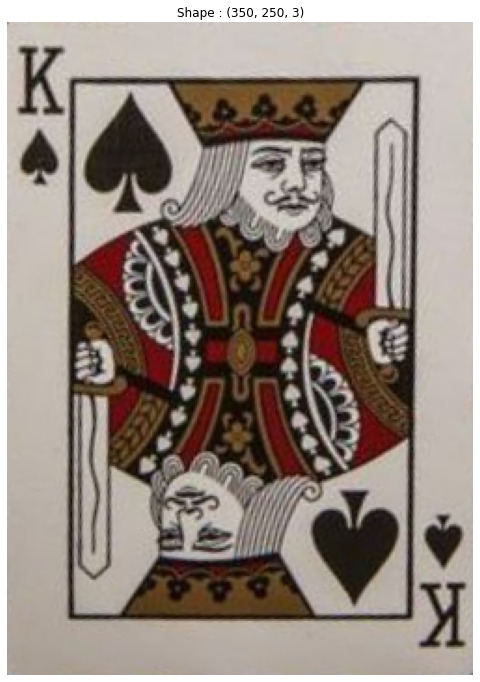

In [67]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image):
       
    plt.figure(figsize = (12,12))
    plt.imshow(image)
    plt.title(f"Shape : {image.shape}")
    plt.axis("off")
    plt.show() 

img = cv2.imread("cards.jpeg")
    
width , height = 250,350

pts1 = np.float32([[111,219],[287,188],[154,482],[352,440]]) 
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])

matrix = cv2.getPerspectiveTransform(pts1,pts2)
output = cv2.warpPerspective(img, matrix,(width,height))

for pts in pts1:
    cv2.circle(img,(int(pts[0]),int(pts[1])),5,(0,0,255),cv2.FILLED)

display(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
display(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))

-----

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

circles = np.zeros((4,2), np.int)
counter = 0
    
def mousePoints(event,x,y,flags,params):
    global counter
    if event == cv2.EVENT_LBUTTONDOWN:
        circles[counter] = x,y
        counter = counter + 1
        print(circles)
        print()

img = cv2.imread("cards.jpeg")

while True:
     
    if counter == 4:
        width,height = 250,350
        pts1 = np.float32([circles[0],circles[1],circles[2],circles[3]]) 
        pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
        
        matrix = cv2.getPerspectiveTransform(pts1,pts2)
        imgOutput = cv2.warpPerspective(img,matrix,(width,height))
        cv2.imshow("Output Image",imgOutput)
            
    for x in range(0,4):
        cv2.circle(img,(circles[x][0],circles[x][1]),15,(0,255,0),cv2.FILLED)
        
    cv2.imshow("Original Image",img)
    cv2.setMouseCallback("Original Image", mousePoints)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cv2.destroyAllWindows()


[[ 14 123]
 [  0   0]
 [  0   0]
 [  0   0]]

[[ 14 123]
 [148  41]
 [  0   0]
 [  0   0]]

[[ 14 123]
 [148  41]
 [126 269]
 [  0   0]]

[[ 14 123]
 [148  41]
 [126 269]
 [251 189]]



---

https://www.hbmacit.com/2020/09/15/python-ve-opencv-ile-rgb-uzerinde-hsv-renk-kodu-tespiti/

**Hue: Renk özünü ifade eden sayısal değer.**


**Saturation: H ile seçilmiş olan rengin doygunluğunu ifade eden sayısal değer.**


**Value (Brightness, Lightness): Parlaklığı ifade eden sayısal değer.**


In [1]:
import cv2
import numpy as np

frameWidth = 640
frameHeight = 480

#img = cv2.imread("car.png")
cap = cv2.VideoCapture(0)
cap.set(3,frameWidth)
cap.set(4,frameHeight)

def empty(a):
    pass

cv2.namedWindow("HSV")
cv2.resizeWindow("HSV",frameWidth,frameHeight)
cv2.createTrackbar("HUE Min","HSV",0,179,empty)
cv2.createTrackbar("HUE Max","HSV",179,179,empty)
cv2.createTrackbar("SAT Min","HSV",0,255,empty)
cv2.createTrackbar("SAT Max","HSV",255,255,empty)
cv2.createTrackbar("VALUE Min","HSV",0,255,empty)
cv2.createTrackbar("VALUE Max","HSV",255,255,empty)


while True:
    
    _, img = cap.read()
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    h_min = cv2.getTrackbarPos("HUE Min","HSV")
    h_max = cv2.getTrackbarPos("HUE Max","HSV")
    s_min = cv2.getTrackbarPos("SAT Min","HSV")
    s_max = cv2.getTrackbarPos("SAT Max","HSV")
    v_min = cv2.getTrackbarPos("VALUE Min","HSV")
    v_max = cv2.getTrackbarPos("VALUE Max","HSV")
    
    lower = np.array([h_min,s_min,v_min])
    upper = np.array([h_max,s_max,v_max])
    
    mask = cv2.inRange(imgHSV,lower,upper)
    result = cv2.bitwise_and(img,img,mask = mask)
    
    # 3 Channels
    mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    hStack = np.hstack([img,mask,result])
    
    #cv2.imshow("Original",img)
    #cv2.imshow("Original HSV",imgHSV)
    #cv2.imshow("Mask",mask)
    #cv2.imshow("Result",result)
    
    cv2.imshow("HSV",hStack)
    
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()